In [1]:
#importing Libraries
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.neighbors import LocalOutlierFactor

In [2]:
#importing dataset
df1=pd.read_csv("titanic.csv")
df2=pd.read_csv("application_train.csv")

In [3]:
df1.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df2.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
#shape of data
print(df1.shape)
print(df2.shape)

(891, 12)
(307511, 122)


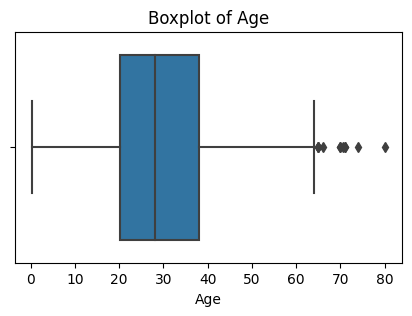

In [6]:
#checking outlier in Age column
plt.figure(figsize=(5, 3))
plt.title('Boxplot of Age')
sns.boxplot(x=df1['Age'])
plt.show()

In [7]:
#statistical measures for detecting outliers in the Age column 
q1 = df1['Age'].quantile(0.25)
q2 = df1['Age'].quantile(0.50)
q3 = df1['Age'].quantile(0.75)
iqr = q3-q1
up = q3+1.5*iqr
low = q1-1.5*iqr

In [8]:
#check outliers
outliers = (df1['Age']<low) | (df1['Age']>up)
df1[outliers]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
33,34,0,2,"Wheadon, Mr. Edward H",male,66.0,0,0,C.A. 24579,10.5000,NaN,S
54,55,0,1,"Ostby, Mr. Engelhart Cornelius",male,65.0,0,1,113509,61.9792,B30,C
96,97,0,1,"Goldschmidt, Mr. George B",male,71.0,0,0,PC 17754,34.6542,A5,C
116,117,0,3,"Connors, Mr. Patrick",male,70.5,0,0,370369,7.7500,NaN,Q
280,281,0,3,"Duane, Mr. Frank",male,65.0,0,0,336439,7.7500,NaN,Q
456,457,0,1,"Millet, Mr. Francis Davis",male,65.0,0,0,13509,26.5500,E38,S
493,494,0,1,"Artagaveytia, Mr. Ramon",male,71.0,0,0,PC 17609,49.5042,NaN,C
630,631,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.0,0,0,27042,30.0000,A23,S
672,673,0,2,"Mitchell, Mr. Henry Michael",male,70.0,0,0,C.A. 24580,10.5000,NaN,S
745,746,0,1,"Crosby, Capt. Edward Gifford",male,70.0,1,1,WE/P 5735,71.0000,B22,S


In [9]:
print(df1[outliers].index)

Index([33, 54, 96, 116, 280, 456, 493, 630, 672, 745, 851], dtype='int64')


In [10]:
print(df1[outliers].any(axis=None))

True


## Generalized Function

In [11]:
def outlier_thresholds(dataframe, column_name, lower_quantile=0.25, upper_quantile=0.75):
    # Calculate the first and third quartiles
    first_quartile = dataframe[column_name].quantile(lower_quantile)
    third_quartile = dataframe[column_name].quantile(upper_quantile)    
    iqr = third_quartile - first_quartile
    upper_limit = third_quartile + 1.5 * iqr
    lower_limit = first_quartile - 1.5 * iqr
    
    return lower_limit, upper_limit

In [12]:
print(outlier_thresholds(df1, "Age"))

(-6.6875, 64.8125)


In [13]:
low, up = outlier_thresholds(df1, "Fare")
outlier = (df1["Fare"] < low) | (df1["Fare"] > up)
df1[outlier].head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0000,C23 C25 C27,S
31,32,1,1,"Spencer, Mrs. William Augustus (Marie Eugenie)",female,NaN,1,0,PC 17569,146.5208,B78,C
34,35,0,1,"Meyer, Mr. Edgar Joseph",male,28.0,1,0,PC 17604,82.1708,NaN,C
52,53,1,1,"Harper, Mrs. Henry Sleeper (Myna Haxtun)",female,49.0,1,0,PC 17572,76.7292,D33,C


In [14]:
#function to check if there is any outliers or not
def check_outlier(dataframe, col_name):
    low_limit, up_limit = outlier_thresholds(dataframe, col_name)
    if dataframe[(dataframe[col_name] > up_limit) | (dataframe[col_name] < low_limit)].any(axis=None):
        return True
    else:
        return False

In [15]:
print(check_outlier(df1, "Age"))   
print(check_outlier(df1, "Fare"))

True
True


In [16]:
#grabing categorical columns, categorical but cardinal columns and numerical columns.
def grab_col_names(dataframe, cat_th=10, car_th=20):

    cat_cols = [col for col in dataframe.columns if dataframe[col].dtypes == "O"]
    num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < cat_th and dataframe[col].dtypes != "O"]
    cat_but_car = [col for col in dataframe.columns if dataframe[col].nunique() > car_th and dataframe[col].dtypes == "O"]
    cat_cols = cat_cols + num_but_cat
    cat_cols = [col for col in cat_cols if col not in cat_but_car]
    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes != "O" and col not in num_but_cat]

    print(f"Observations: {dataframe.shape[0]}")
    print(f"Variables: {dataframe.shape[1]}")
    print(f"cat_cols: {len(cat_cols)}")
    print(f"num_cols: {len(num_cols)}")
    print(f"cat_but_car: {len(cat_but_car)}")
    print(f"num_but_cat: {len(num_but_cat)}")

    return cat_cols, num_cols, cat_but_car

In [17]:
cat_cols, num_cols, cat_but_car = grab_col_names(df1)

Observations: 891
Variables: 12
cat_cols: 6
num_cols: 3
cat_but_car: 3
num_but_cat: 4


In [18]:
num_cols = [col for col in num_cols if col not in "PassengerId"]
print(num_cols)

['Age', 'Fare']


In [19]:
for col in num_cols:
    print(col, check_outlier(df1, col))

Age True
Fare True


In [20]:
cat_cols, num_cols, cat_but_car = grab_col_names(df2)

Observations: 307511
Variables: 122
cat_cols: 54
num_cols: 67
cat_but_car: 1
num_but_cat: 39


In [21]:
num_cols.remove('SK_ID_CURR')
print()

In [22]:
#checking columns of df2 having outliers.
for col in num_cols:
    print(col, check_outlier(df2, col))

CNT_CHILDREN True
AMT_INCOME_TOTAL True
AMT_CREDIT True
AMT_ANNUITY True
AMT_GOODS_PRICE True
REGION_POPULATION_RELATIVE True
DAYS_BIRTH False
DAYS_EMPLOYED True
DAYS_REGISTRATION True
DAYS_ID_PUBLISH False
OWN_CAR_AGE True
CNT_FAM_MEMBERS True
HOUR_APPR_PROCESS_START True
EXT_SOURCE_1 False
EXT_SOURCE_2 False
EXT_SOURCE_3 False
APARTMENTS_AVG True
BASEMENTAREA_AVG True
YEARS_BEGINEXPLUATATION_AVG True
YEARS_BUILD_AVG True
COMMONAREA_AVG True
ELEVATORS_AVG True
ENTRANCES_AVG True
FLOORSMAX_AVG True
FLOORSMIN_AVG True
LANDAREA_AVG True
LIVINGAPARTMENTS_AVG True
LIVINGAREA_AVG True
NONLIVINGAPARTMENTS_AVG True
NONLIVINGAREA_AVG True
APARTMENTS_MODE True
BASEMENTAREA_MODE True
YEARS_BEGINEXPLUATATION_MODE True
YEARS_BUILD_MODE True
COMMONAREA_MODE True
ELEVATORS_MODE True
ENTRANCES_MODE True
FLOORSMAX_MODE True
FLOORSMIN_MODE True
LANDAREA_MODE True
LIVINGAPARTMENTS_MODE True
LIVINGAREA_MODE True
NONLIVINGAPARTMENTS_MODE True
NONLIVINGAREA_MODE True
APARTMENTS_MEDI True
BASEMENTAREA_MEDI 

In [23]:
#function to show us the outlier values for the associated column
def grab_outliers(dataframe, col_name, outlier_index=False, f=5):
    low, up = outlier_thresholds(dataframe, col_name)
    outliers = dataframe[((dataframe[col_name] < low) | (dataframe[col_name] > up))]

    if outliers.shape[0] > 10:
        outliers_to_show = outliers.head(f)
    else:
        outliers_to_show = outliers

    print(outliers_to_show)

    if outlier_index:
        out_index = outliers.index
        return out_index

In [24]:
age_index = grab_outliers(df1, "Age", True)

     PassengerId  Survived  Pclass                            Name   Sex  \
33            34         0       2           Wheadon, Mr. Edward H  male   
54            55         0       1  Ostby, Mr. Engelhart Cornelius  male   
96            97         0       1       Goldschmidt, Mr. George B  male   
116          117         0       3            Connors, Mr. Patrick  male   
280          281         0       3                Duane, Mr. Frank  male   

      Age  SibSp  Parch      Ticket     Fare Cabin Embarked  
33   66.0      0      0  C.A. 24579  10.5000   NaN        S  
54   65.0      0      1      113509  61.9792   B30        C  
96   71.0      0      0    PC 17754  34.6542    A5        C  
116  70.5      0      0      370369   7.7500   NaN        Q  
280  65.0      0      0      336439   7.7500   NaN        Q  


In [25]:
print(age_index)

Index([33, 54, 96, 116, 280, 456, 493, 630, 672, 745, 851], dtype='int64')


## Removing Outliers 

In [26]:
df = df1
low, up = outlier_thresholds(df, "Fare")
filt = (df["Fare"] < low) | (df["Fare"] > up)
print("No. of Fare Outlier entry is: ", df.shape[0]-df[~filt].shape[0])

No. of Fare Outlier entry is:  116


## Generalized function for removing outliers

In [27]:
def remove_outlier(dataframe, col_name):
    low_limit, up_limit = outlier_thresholds(dataframe, col_name)
    df_without_outliers = dataframe[~((dataframe[col_name] < low_limit) | (dataframe[col_name] > up_limit))]
    return df_without_outliers

In [28]:
cat_cols, num_cols, cat_but_car = grab_col_names(df)

Observations: 891
Variables: 12
cat_cols: 6
num_cols: 3
cat_but_car: 3
num_but_cat: 4


In [29]:
num_cols.remove('PassengerId')

In [30]:
for col in num_cols:
    df = remove_outlier(df,col)

In [31]:
print(df.shape)

(765, 12)


In [32]:
df=df1

## Local Outlier Factor (LOF)

In [33]:
df = sns.load_dataset('diamonds')
print(df.shape)  
df.head()

(53940, 10)


,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [34]:
#Selecting only numeric cols
df = df.select_dtypes(['float64', 'int64'])
df = df.dropna()
print(df.shape)

(53940, 7)


In [35]:
#checking columns that contain outliers
for col in df.columns:
    print(col, check_outlier(df, col))

carat True
depth True
table True
price True
x True
y True
z True


In [36]:
#rows contain outlier 'carat'
low, up = outlier_thresholds(df, "carat")
print(df[((df["carat"] < low) | (df["carat"] > up))].shape)

(1889, 7)


In [37]:
#rows contain outlier 'depth'
low, up = outlier_thresholds(df, "depth")
print(df[((df["depth"] < low) | (df["depth"] > up))].shape)

(2545, 7)


In [38]:
#transforming each point to a score according to the LOF
clf = LocalOutlierFactor(n_neighbors=20)

In [39]:
clf.fit_predict(df)

array([-1, -1, -1, ...,  1,  1,  1])

In [40]:
df_scores = clf.negative_outlier_factor_
print(df_scores)

[-1.58352526 -1.59732899 -1.62278873 ... -1.06721815 -1.00809552
 -1.00849038]


In [41]:
print(np.sort(df_scores)[0:5])

[-8.60430658 -8.20889984 -5.86084355 -4.98415175 -4.81502092]


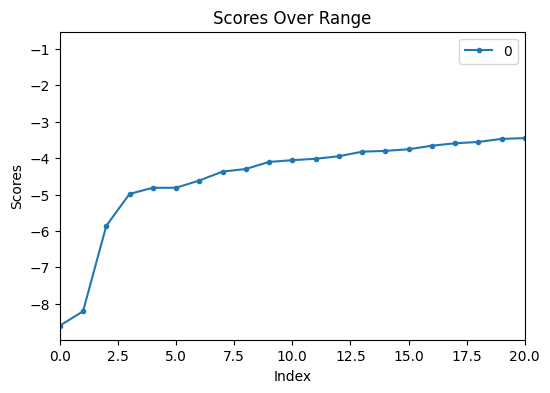

In [42]:
#visulalization of first 20 sorted  df_scores
scores = pd.DataFrame(np.sort(df_scores))
scores.plot(stacked=True, xlim=[0, 20], style='.-', figsize=(6,4), title='Scores Over Range')
plt.xlabel('Index')
plt.ylabel('Scores')
plt.show()